In [1]:
from cmdstanpy import CmdStanModel
from matplotlib.gridspec import GridSpec

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

EXERCISE 1

In [2]:

_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [3]:

model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


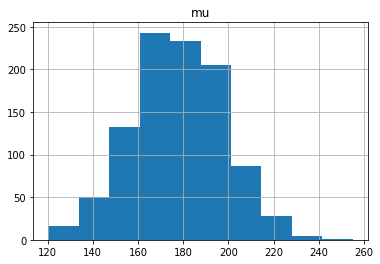

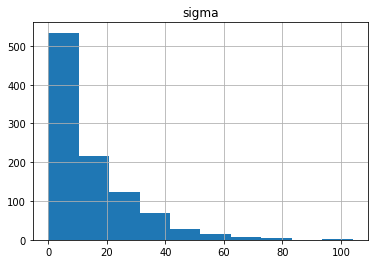

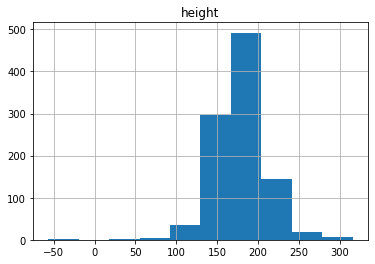

In [4]:
df_sim=sim.draws_pd().drop(columns=["lp__","accept_stat__"])
df_sim["mu"].hist()
plt.title("mu")
plt.show()
df_sim["sigma"].hist()
plt.title("sigma")
plt.show()
df_sim["height"].hist()
plt.title("height")
plt.show()


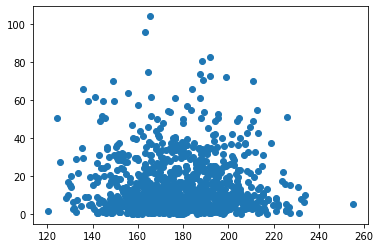

In [5]:
plt.scatter(df_sim["mu"],df_sim["sigma"])

#fig = plt.figure()
#gs = GridSpec(4, 4)

#ax_scatter = fig.add_subplot(gs[1:4, 0:3])
#ax_hist_x = fig.add_subplot(gs[0,0:3])
#ax_hist_y = fig.add_subplot(gs[1:4, 3])

#ax_scatter.scatter(df['mu'], df['sigma'])

#ax_hist_x.hist(df['mu'])
#ax_hist_y.hist(df['sigma'], orientation = 'horizontal')

plt.show()

In [6]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [7]:
fit=model_1_fit.sample(data=dict(N=len(d),heights=d.height.values),seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [8]:
df_fit=fit.draws_pd()#drop(columns=["lp__","accept_stat__","stepsize__","treedepth__","n_leapfrog__","divergent__","energy__"])
#print(df_fit)
df_fit.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma,height
0,-896.475,0.989141,0.879734,3.0,7.0,0.0,898.035,155.103,8.10072,151.389
1,-895.714,0.996108,0.879734,2.0,3.0,0.0,896.915,154.992,7.57395,153.867
2,-896.343,0.895673,0.879734,2.0,3.0,0.0,897.119,155.228,7.90630,146.875
3,-895.404,0.991829,0.879734,2.0,3.0,0.0,896.577,154.815,7.56726,154.424
4,-895.849,0.841095,0.879734,2.0,3.0,0.0,896.865,154.890,8.04910,147.182


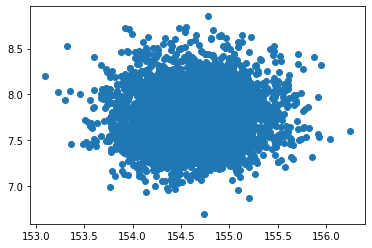

In [9]:
plt.scatter(df_fit["mu"],df_fit["sigma"])
plt.show()

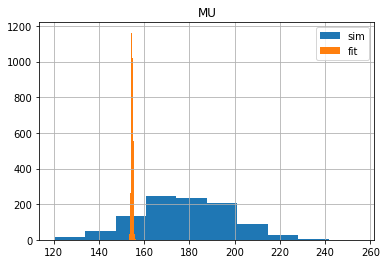

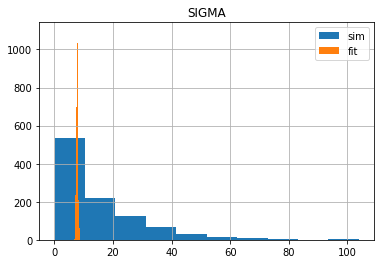

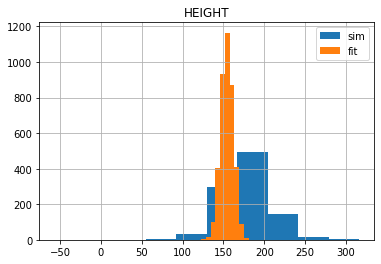

In [10]:
df2=fit.draws_pd().drop(columns=["lp__","accept_stat__","stepsize__","treedepth__","n_leapfrog__","divergent__","energy__"])
df_sim['mu'].hist()
df_fit['mu'].hist()
plt.legend(["sim","fit"])
plt.title("MU")
plt.show()

df_sim['sigma'].hist()
df_fit['sigma'].hist()
plt.legend(["sim","fit"])
plt.title("SIGMA")
plt.show()

df_sim['height'].hist()
df_fit['height'].hist()
plt.legend(["sim","fit"])
plt.title("HEIGHT")
plt.show()

In [11]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
d["c_weight"]=pd.NaT
w_mean=d["weight"].mean()
print(w_mean)
for i in d.index:
    d["c_weight"][i]=d["weight"][i]-w_mean
#print(d)

INFO:cmdstanpy:found newer exe file, not recompiling


44.99048551988636


C:\Users\mjszo\AppData\Local\Temp\ipykernel_28100\2214102645.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["c_weight"][i]=d["weight"][i]-w_mean
C:\Users\mjszo\AppData\Local\Temp\ipykernel_28100\2214102645.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["c_weight"][i]=d["weight"][i]-w_mean


In [12]:
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}

sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)
df_sim=sim.draws_pd()




INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [13]:
x=np.linspace(d["weight"].min(),d["weight"].max(),1000)

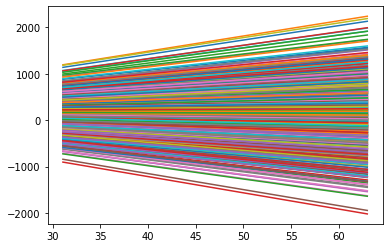

In [57]:
y=[]
for j in range(0,1000):
    y.append(x[j]*df_sim['beta']+df_sim['alpha'])

#print(df_sim['alpha'][10])
plt.plot(x,y)


In [60]:
m=0
for i in range(1,51):
    for j in range (0,999):
        if (df[f"height[{i}]"][j])<0 or (df[f"height[{i}]"][j])>272:
            #print(df[f"height[{i}]"][j])
            m+=1
print(f"Wrong values {m} times")

Wrong values 944 times


In [58]:


model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')



INFO:cmdstanpy:found newer exe file, not recompiling


In [63]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)
df_sim=sim.draws_pd()
#print(df_sim)
#print(type(df["height[50]"]))


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


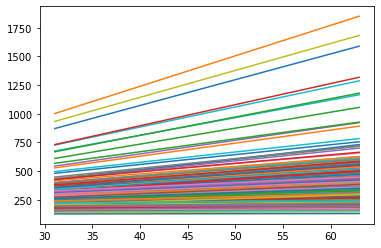

In [64]:
y=[]
for j in range(0,1000):
    y.append(x[j]*df_sim['beta']+df_sim['alpha'])

#print(df_sim['alpha'][10])
plt.plot(x,y)


In [67]:
m=0
for i in range(1,51):
    for j in range (0,999):
        if (df_sim[f"height[{i}]"][j])<0 or (df[f"height[{i}]"][j])>272:
            #print(df[f"height[{i}]"][j])
            m+=1
print(f"Wrong values {m} times")

Wrong values 944 times


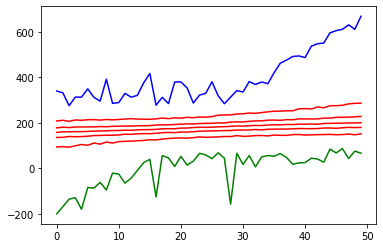

In [73]:
v_min=[]
v_max=[]
q5=[]
q25=[]
q50=[]
q75=[]
q95=[]

for i in range(1,51):
    v_min.append(df_sim[f"height[{i}]"].min())
    v_max.append(df_sim[f"height[{i}]"].max())
    q5.append(df_sim[f"height[{i}]"].quantile(q=0.05))
    q25.append(df_sim[f"height[{i}]"].quantile(q=0.25))
    q50.append(df_sim[f"height[{i}]"].quantile(q=0.5))
    q75.append(df_sim[f"height[{i}]"].quantile(q=0.75))
    q95.append(df_sim[f"height[{i}]"].quantile(q=0.95))
    
plt.plot(v_min,color='g')
plt.plot(v_max,color='b')
plt.plot(q5, color='r')    
plt.plot(q25, color='r')    
plt.plot(q50, color='r')    
plt.plot(q75, color='r')    
plt.plot(q95, color='r')  
plt.show()

In [84]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [102]:
#data_fit=dict(N=len(d),weight=d["weight"],heights=d["height"])
#rint(data_fit)


data_fit=dict(N=len(d),heights=d.height.values,weight=d.weight.values)





In [103]:
fit=model_2_fit.sample(data=data_fit,seed=28052020)
df_fit=fit.draws_pd()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |████


INFO:cmdstanpy:CmdStan done processing.


In [104]:
df_fit.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma,...,height[343],height[344],height[345],height[346],height[347],height[348],height[349],height[350],height[351],height[352]
0,-753.412,0.982807,0.112327,5.0,31.0,0.0,755.799,112.426,0.929975,5.11190,...,148.842,156.914,138.389,140.011,150.597,153.090,145.877,160.058,152.412,161.831
1,-754.389,0.966599,0.112327,6.0,63.0,0.0,755.621,111.900,0.957567,5.12549,...,152.151,161.331,152.787,152.264,157.593,154.647,144.105,161.270,162.140,157.722
2,-757.737,0.654552,0.112327,3.0,15.0,0.0,760.246,111.624,0.971302,5.29889,...,156.250,158.732,142.857,146.408,148.790,157.017,149.000,163.886,169.550,163.293
3,-755.818,0.758725,0.112327,2.0,3.0,0.0,760.997,110.481,0.970542,5.28668,...,154.190,155.366,152.040,154.249,151.939,145.792,147.613,163.154,162.948,167.607
4,-759.857,0.596655,0.112327,5.0,63.0,0.0,762.695,115.211,0.895797,4.77694,...,154.834,167.744,149.840,156.100,159.727,151.276,143.253,162.812,168.524,166.043


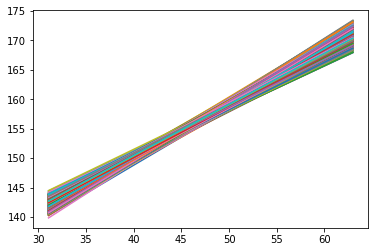

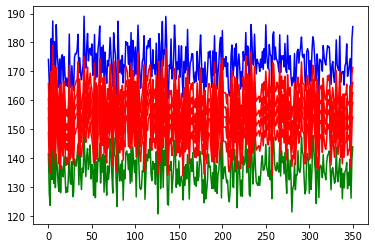

In [108]:
y=[]
for j in range(0,1000):
    y.append(x[j]*df_fit['beta']+df_fit['alpha'])
plt.plot(x,y)
plt.show()

v_min=[]
v_max=[]
q5=[]
q25=[]
q50=[]
q75=[]
q95=[]

for i in range(1,352):
    v_min.append(df_fit[f"height[{i}]"].min())
    v_max.append(df_fit[f"height[{i}]"].max())
    q5.append(df_fit[f"height[{i}]"].quantile(q=0.05))
    q25.append(df_fit[f"height[{i}]"].quantile(q=0.25))
    q50.append(df_fit[f"height[{i}]"].quantile(q=0.5))
    q75.append(df_fit[f"height[{i}]"].quantile(q=0.75))
    q95.append(df_fit[f"height[{i}]"].quantile(q=0.95))
    
plt.plot(v_min,color='g')
plt.plot(v_max,color='b')
plt.plot(q5, color='r')    
plt.plot(q25, color='r')    
plt.plot(q50, color='r')    
plt.plot(q75, color='r')    
plt.plot(q95, color='r')  
plt.show()